This file gives an example showing how to run mezzo_s standalone from Python and collect the results

In [47]:
import os

filepath = f'E:/AH2174/Mezzo/mezzo_s.exe' # This is the relative path to the mezzo_s executable, please adapt to your case
seed = 3 # This defines the random seed

# for scenarioA
scenario_A = f'E:/AH2174/lab3/Stochastic_sim/ScenarioA/sodermalm.mezzo' # This is the relative path to the scenario you want to run. # Note that you need to update for different scenario paths
outputpath_A = f'E:/AH2174/lab3/Stochastic_sim/ScenarioA/output/summary.dat' #update for different scenario paths.
executepath_A = filepath + ' ' + scenario_A + ' ' + str(seed) 
# os.system(executepath_A) # This calls the simulation

# for scenarioB
scenario_B = f'E:/AH2174/lab3/Stochastic_sim/ScenarioB/sodermalm.mezzo' # This is the relative path to the scenario you want to run. # Note that you need to update for different scenario paths
outputpath_B = f'E:/AH2174/lab3/Stochastic_sim/ScenarioB/output/summary.dat' #update for different scenario paths.
executepath_B = filepath + ' ' + scenario_B + ' ' + str(seed)
# os.system(executepath_B) # This calls the simulation


Now run the simulation 6 times with a different random seed, and collect the average speed. 

Note: Here I choose to do it via the summary.dat file which has for each OD pair the totalMileage(m) and TotalTraveltime(s). There are other ways, for instance using speeds.dat. You can also decide to weigh the speeds, for instance by nr of arrivals for each OD pair (make sure you exclude OD pairs with 0 arrivals)

In [46]:
import pandas as pd

avg_speed_A = pd.DataFrame()
avg_speed_B = pd.DataFrame()

vals_A = []
vals_B = []

for i in range (1,6):
    seed = i # This defines the random seed
    executepath_A = filepath + ' ' + scenario_A + ' ' + str(seed)
    executepath_B = filepath + ' ' + scenario_B + ' ' + str(seed) 

    os.system(executepath_A) # This calls the simulation
    os.system(executepath_B) # This calls the simulation

    summary_df_A = pd.read_csv(outputpath_A, sep='\t') 
    summary_df_A['avg_speed'] = summary_df_A ['TotalMileage(m)']/summary_df_A['TotalTravelTime(s)']
    vals_A.append(summary_df_A.loc[:,'avg_speed'].mean())

    summary_df_B = pd.read_csv(outputpath_B, sep='\t') 
    summary_df_B['avg_speed'] = summary_df_B ['TotalMileage(m)']/summary_df_B['TotalTravelTime(s)']
    vals_B.append(summary_df_B.loc[:,'avg_speed'].mean())

In [57]:
print(vals_A)
print(vals_B)

[19.45161396 19.4836492  19.45832106 19.45325841 19.47115925]
[18.18558714 18.18241355 18.14892777 18.16440607 18.12825941]


You can use the statistics package to calculate means, variances etc.

Determine the required number of simulation runs for each of the two scenarios (Refer to slides for Lecture 5), in order to reach an acceptable error of 0.01 (1%) for the estimate of average network speed. 

Tip: start with an initial N = 5 simulation runs (with different seeds), then based on those determine how many more runs you need to do, then repeat this process until you have done more than your latest estimation for N

So by referring to the equation in lecture 5, we write a function to calculate the required simulation runs for both scenarios.

In [50]:
from scipy.stats import t
import numpy as np

def calculate_required_simulation_runs(vals, alpha=0.05, error=0.01):
  degrees_of_freedom = len(vals)-1
  std=np.std(vals)
  mean=np.mean(vals)
  t_statistic = t.ppf(1-alpha/2, degrees_of_freedom)

  required_runs = ((t_statistic * std) / (error*mean)) ** 2
  return required_runs

# Calculate required simulation runs for scenarios A and B
required_runs_A = calculate_required_simulation_runs(vals_A)
required_runs_B = calculate_required_simulation_runs(vals_B)

print(f'Required simualtion runs for scenario A: {required_runs_A}')
print(f'Required simualtion runs for scenario B: {required_runs_B}')

Required simualtion runs for scenario A: 0.03001781869633584
Required simualtion runs for scenario B: 0.1069463461026142


The required simulation runs results both are lower than 1, indicating that 5 simulation runs are enough for both scenarios.



Define the null and alternative hypotheses:  
Null Hypothesis (H0): There is no significant difference in the average network speed between scenario A and scenario B.  
Alternative Hypothesis (H1): There is a significant difference in the average network speed between scenario A and scenario B.

Hypothesis Testing:  
1. Set the significance level (α) to 0.05
2. Collect simulation data for both scenarios: vals_A, vals_B
3. Use a t-test to compare the average network speeds of scenario A and B.

Result and Conclusion:

If the p-value is less than the significance level (α), reject the null hypothesis.  
If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis.
Interpretation:

Intepretation:
If the null hypothesis is rejected, it suggests that there is a significant difference in the average network speed between scenario A and B.  
If the null hypothesis is not rejected, it implies that there is insufficient evidence to claim a significant difference in average network speed between the two scenarios.  

Note:
The p-value is a crucial indicator in hypothesis testing. It represents the probability of obtaining the observed results (or more extreme) if the null hypothesis is true. A lower p-value suggests stronger evidence against the null hypothesis.

In [55]:
from scipy import stats
import scipy.stats as ss

# Assume alpha (significance level) is 0.05
alpha = 0.05

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(vals_A, vals_B)

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")


# Convert lists to NumPy arrays
vals_A = np.array(vals_A)
vals_B = np.array(vals_B)

# Calculate the confidence interval for the difference in means using scipy.stats.t.interval
confidence_interval_scipy = ss.t.interval(0.95, len(vals_A)-1, loc=np.mean(vals_A)-np.mean(vals_B), scale=ss.sem(vals_A - vals_B))

print("Confidence Interval using scipy.stats.t.interval:", confidence_interval_scipy)

Reject the null hypothesis. There is a significant difference.
Confidence Interval using scipy.stats.t.interval: (1.2665924076059152, 1.3367707687693813)


Use for instance matplotlib to plot boxplots for values. This can also give an idea of sizes of confidence intervals (besides calculation)

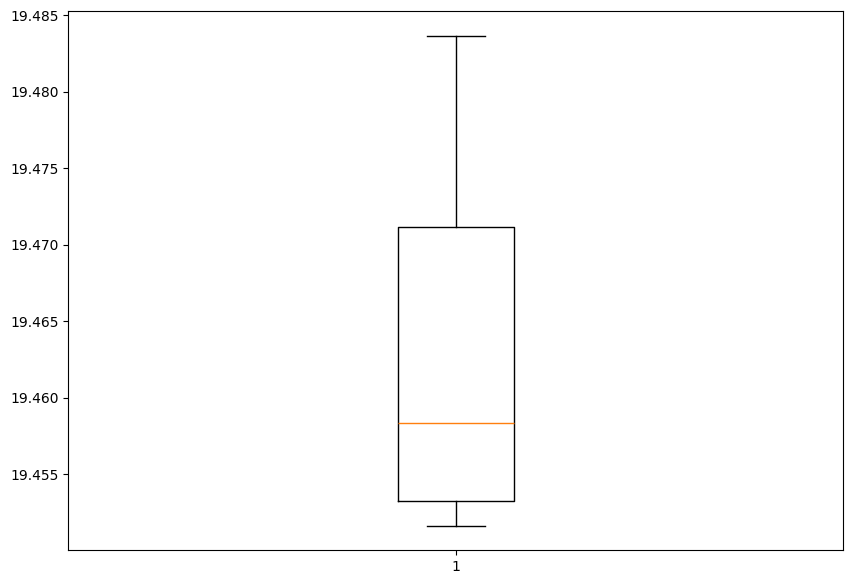

In [58]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(vals_A)
 
# show plot
plt.show()